In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import tensorflow as tf
import numpy as np


In [5]:
width = 224
height = 224
batch_size = 32
data_dir = r"/content/drive"

In [6]:
training = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset = "training",
    seed = 123,
    image_size = (height,width),
    batch_size= batch_size
)

Found 144 files belonging to 4 classes.
Using 101 files for training.


In [8]:
validation = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.3,
    subset = "validation",
    seed = 123,
    image_size = (height,width),
    batch_size = batch_size
)

Found 144 files belonging to 4 classes.
Using 43 files for validation.


In [9]:
training

<BatchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int32)>

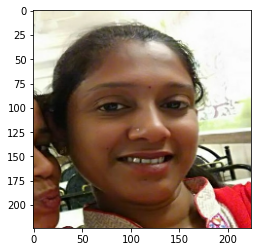

In [10]:
import matplotlib.pyplot as plt
for images, labels in training.take(1):
  plt.imshow(images[1].numpy().astype("uint8"))

In [12]:
from tensorflow.keras.applications import MobileNetV2

In [14]:
model = MobileNetV2(weights = "imagenet")

14540800/14536120 [==============================] - 0s 0us/step


In [15]:
model.compile(optimizer = "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ["accuracy"])

In [16]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [17]:
face_mask_detection = model.fit(training,validation_data=validation,epochs=3)

Epoch 1/3
4/4 [==============================] - 47s 11s/step - loss: 5.3968 - accuracy: 0.3141 - val_loss: 56.5554 - val_accuracy: 0.0000e+00
Epoch 2/3
4/4 [==============================] - 26s 6s/step - loss: 0.3997 - accuracy: 1.0000 - val_loss: 49.0916 - val_accuracy: 0.0000e+00
Epoch 3/3
4/4 [==============================] - 26s 6s/step - loss: 0.1016 - accuracy: 1.0000 - val_loss: 43.7125 - val_accuracy: 0.0000e+00


In [27]:
img = tf.keras.preprocessing.image.load_img("3-with-mask.jpg",target_size=(height,width))
image_array = tf.keras.preprocessing.image.img_to_array(img)
image_array = tf.expand_dims(image_array,0)
image_array.shape

TensorShape([1, 224, 224, 3])

In [28]:
predictions = model.predict(image_array)
score = tf.nn.softmax(predictions[0])

In [29]:
print(score)

tf.Tensor(
[0.00099866 0.00099867 0.00099866 0.00099866 0.00099866 0.00099866
 0.00099866 0.00099901 0.00099866 0.00099866 0.00099868 0.00099866
 0.00099866 0.00100134 0.00099872 0.00099873 0.00099867 0.00099868
 0.00099869 0.00099867 0.00099867 0.00099866 0.0009987  0.0009988
 0.00099866 0.00099867 0.00099866 0.00099866 0.00099866 0.00099866
 0.00099866 0.00099866 0.00099866 0.00099866 0.00099866 0.00099898
 0.00099885 0.00099919 0.00099866 0.00099866 0.00099866 0.00099866
 0.00099885 0.00099884 0.00099866 0.00099866 0.00099866 0.00099873
 0.00099866 0.00099866 0.00099866 0.00099866 0.00099867 0.00099866
 0.00099866 0.00099866 0.00099866 0.00099866 0.00099866 0.00099866
 0.00099866 0.00099866 0.00099866 0.00099915 0.00099866 0.00099866
 0.00099866 0.00099866 0.00099866 0.00099866 0.00099866 0.00099866
 0.00099866 0.00099866 0.00099866 0.00099866 0.00099866 0.00099866
 0.00099866 0.00099866 0.00099894 0.00099866 0.00099866 0.00099875
 0.00099866 0.00099866 0.00099866 0.00099886 0.00099

In [32]:
model.save("dummy.model",save_format="h5")